In [ ]:
import pandas as pd
import numpy as np


Filling Missing Values 'none' and 'None'

In [ ]:
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')

In [ ]:
outcome=train['outcome']
outcome.head(1)

In [ ]:
train = train[['id', 'surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
               'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
              'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
               'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
               'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
               'packed_cell_volume', 'total_protein', 'abdomo_appearance',
               'abdomo_protein', 'surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3',
               'cp_data']]


In [ ]:
train.describe()


In [ ]:
train.info()


In [ ]:
train.shape

In [136]:
# Replace None with NaN using replace()
# train.replace(to_replace=None, value=np.nan, inplace=True)
# train = train.fillna(value=np.nan)
value_to_replace = 'none'
# column_to_replace_in = 'temp_of_extremities'
# train.loc[train[column_to_replace_in] ==
#        value_to_replace, column_to_replace_in] = np.nan
columns_to_replace_in = train.columns  # .to_list()
for column in columns_to_replace_in:
    train.loc[train[column] == value_to_replace, column] = np.nan
columns_to_replace_in = test.columns  # .to_list()
for column in columns_to_replace_in:
    test.loc[test[column] == value_to_replace, column] = np.nan
#

In [143]:
test.isnull().sum()


id                       0
surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         1
nasogastric_reflux       3
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
dtype: int64

In [142]:

# train.to_csv('train1.csv',index=False)
# test.to_csv('test1.csv',index=False)
# outcome.to_csv('outcome_train.csv',index=False)
train.isnull().sum()


id                       0
surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
dtype: int64

In [ ]:
train['temp_of_extremities'].fillna(train['temp_of_extremities'].mode()[0], inplace=True)
test['temp_of_extremities'].fillna(test['temp_of_extremities'].mode()[0],inplace=True)
train['peripheral_pulse'].fillna(train['peripheral_pulse'].mode()[0], inplace=True)
test['peripheral_pulse'].fillna(test['peripheral_pulse'].mode()[0],inplace=True)
train['capillary_refill_time'].fillna(
    train['capillary_refill_time'].mode()[0], inplace=True)
test['capillary_refill_time'].fillna(test['capillary_refill_time'].mode()[0],inplace=True)

In [139]:
# print(train["mucous_membrane"].unique())
print(train["abdominal_distention"].value_counts())
print(test["abdominal_distention"].value_counts())


moderate    551
slight      354
severe      114
Name: abdominal_distention, dtype: int64
moderate    336
slight      264
severe       69
Name: abdominal_distention, dtype: int64


In [140]:
column_to_impute = ['mucous_membrane', 'pain',
                    'peristalsis', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux']
for column in column_to_impute:
    train[column] = train[column].fillna(method='ffill')
    test[column] = test[column].fillna(method='ffill')


In [141]:
value_to_count = 'none'
c=test.columns
count_in_train=0
count_in_test=0
for i in c:
    count_in_train = count_in_train + (train[i] == value_to_count).sum()
    count_in_test = count_in_test + (test[i] == value_to_count).sum()
print(count_in_train)
print(count_in_test)



0
0


Data Visualisation

In [145]:
import matplotlib.pyplot as plt


In [153]:
test['age'].value_counts()

adult    782
young     42
Name: age, dtype: int64

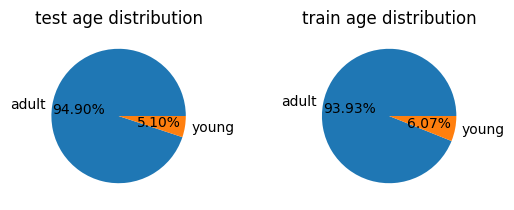

In [162]:
frequency = test['age'].value_counts()
frequency1 = train['age'].value_counts()
fig = plt.figure()
ax = fig.add_subplot(221)
ay = fig.add_subplot(222)
ax.pie(frequency, labels=['adult', 'young'], autopct='%1.2f%%')
ax.set_title('test age distribution')
ay.pie(frequency1, labels=['adult', 'young'], autopct='%1.2f%%')
ay.set_title('train age distribution')
plt.show()


In [164]:
test['surgery'].unique()

array(['no', 'yes'], dtype=object)

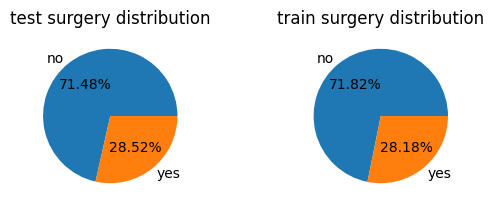

In [166]:
frequency = test['surgery'].value_counts()
frequency1 = train['surgery'].value_counts()
fig = plt.figure()
ax = fig.add_subplot(221)
ay = fig.add_subplot(222)
ax.pie(frequency, labels=['no', 'yes'], autopct='%1.2f%%')
ax.set_title('test surgery distribution')
ay.pie(frequency1, labels=['no', 'yes'], autopct='%1.2f%%')
ay.set_title('train surgery distribution')
plt.show()


In [179]:
print(test["hospital_number"].value_counts())
print(train["hospital_number"].value_counts())
print("total number of hospital in test data: ",len(test["hospital_number"].unique()))
print("total number of hospital in train data: ", len(train["hospital_number"].unique()))



529461.0     35
528469.0     22
528548.0     21
5287179.0    18
528890.0     15
             ..
530439.0      1
528620.0      1
533736.0      1
530624.0      1
534163.0      1
Name: hospital_number, Length: 210, dtype: int64
529461.0     46
528548.0     32
528996.0     21
5290409.0    20
529667.0     20
             ..
532985.0      1
527526.0      1
535415.0      1
5289419.0     1
530157.0      1
Name: hospital_number, Length: 255, dtype: int64
total number of hospital in test data:  210
total number of hospital in train data:  255


In [180]:
train.describe()

,id,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,1235.0000,1.235000e+03,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000
mean,617.0000,9.545004e+05,38.202186,79.574089,30.054251,4.382591,49.602429,21.388016,3.290931,3832.496356,14.612146,3.577328
std,356.6581,1.356403e+06,0.788668,29.108638,16.452066,1.937357,10.535800,26.676453,1.589195,5436.733774,193.705735,88.858953
min,0.0000,5.213990e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.500000,0.100000,0.000000,0.000000,0.000000
25%,308.5000,5.288000e+05,37.800000,53.000000,18.000000,2.000000,43.000000,6.600000,2.000000,2205.000000,0.000000,0.000000
50%,617.0000,5.297770e+05,38.200000,76.000000,28.000000,4.500000,48.000000,7.500000,3.000000,2209.000000,0.000000,0.000000
75%,925.5000,5.341450e+05,38.600000,100.000000,36.000000,6.000000,57.000000,9.100000,4.300000,3205.000000,0.000000,0.000000
max,1234.0000,5.305129e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,3112.000000,2209.000000


In [181]:
print("total number of rectal_temp in test data: ",
      len(test["rectal_temp"].unique()))
print("total number of rectal_temp in train data: ",
      len(train["rectal_temp"].unique()))


total number of rectal_temp in test data:  34
total number of rectal_temp in train data:  43


Normalizing rectal_temp and pulse column